#### Practice KMeans & PCA
* compare the different [normalization methods by sklearn](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)
* wholesale dataset --> clustering of customers & product types

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import sklearn.preprocessing as prep
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load the wholesale data
flc = '/Users/pinqingkan/Desktop/DataScience/PythonDataScience/DAT210x-master/Module5/Datasets/'
fname = flc + 'Wholesale customers data.csv'
X = pd.read_csv(fname)

In [3]:
# check if there's NaN
(X.isnull() == True).sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [4]:
# disregard the channel & region difference
X = X.drop(axis = 1, labels = ['Channel', 'Region'])

In [5]:
X.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


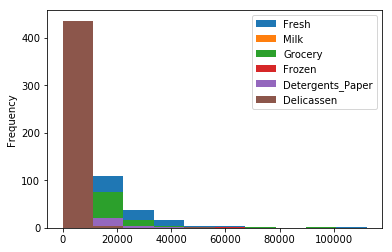

In [6]:
X.plot.hist()
plt.show()

In [7]:
# remove top 5 & bottom 5 customers
idc1 = []
idc2 = []
for col in X.columns:
    sort = X.loc[:, col].sort_values(ascending = True)
    sort1 = sort[:5] # top 5
    idc1 = idc1 + list(sort1.index)
    sort2 = sort[-5:] # bottom 5
    idc2 = idc2 + list(sort2.index)
idc1 = list(set(idc1)) # remove duplicate
idc2 = list(set(idc2))
Y = X.drop(idc1+idc2, axis = 0)

In [8]:
Y.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,10996.231156,5144.090452,7091.711055,2639.721106,2562.974874,1278.736181
std,9933.042596,5057.406574,6923.019293,2974.246906,3608.176776,1220.745297
min,37.000000,258.000000,314.000000,47.000000,10.000000,11.000000
25%,3324.500000,1571.250000,2155.500000,749.750000,273.250000,409.500000
50%,8257.500000,3607.500000,4573.000000,1526.000000,812.000000,946.500000
75%,15828.500000,6953.250000,9922.250000,3370.250000,3841.500000,1752.250000
max,53205.000000,29892.000000,39694.000000,17866.000000,19410.000000,7844.000000


In [9]:
# KMeans clustering
def doKMeans(Y0, K):
    kmeans = KMeans(n_clusters = K)
    kmeans.fit(Y0)
    KMeans(n_clusters = K, max_iter = 300, n_init = 10, init = 'k-means++', copy_x = True,
           n_jobs = 1, precompute_distances = 'auto', random_state = None, tol = 1e-4,
           verbose = 0)
    centroids = kmeans.cluster_centers_
    labels = kmeans.labels_
    return centroids, labels

In [10]:
# PCA
def doPCA(Y0, nD):
    pca = PCA(n_components = nD, svd_solver = 'full')
    pca.fit(Y0)
    return pca

In [11]:
# parameters
K = 3 # No. of clusters
nD = 2 # No. of PC
clr = ['red', 'green', 'blue', 'orange', 'yellow', 'brown']

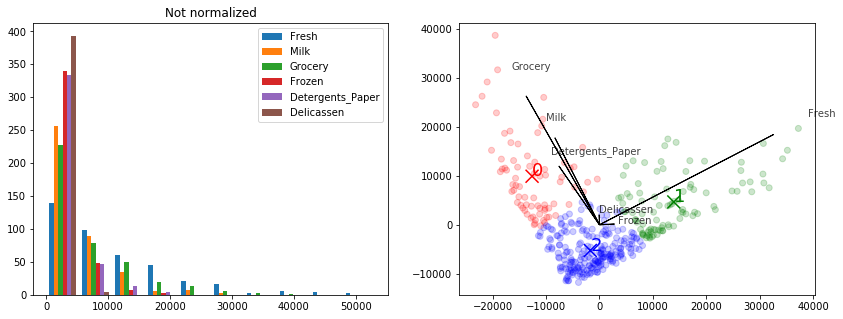

/Users/pinqingkan/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


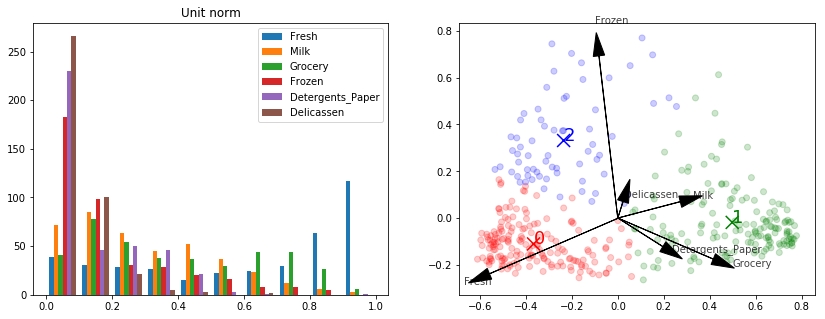

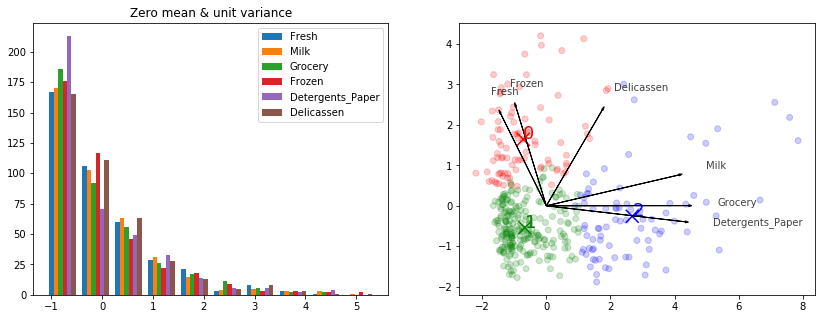

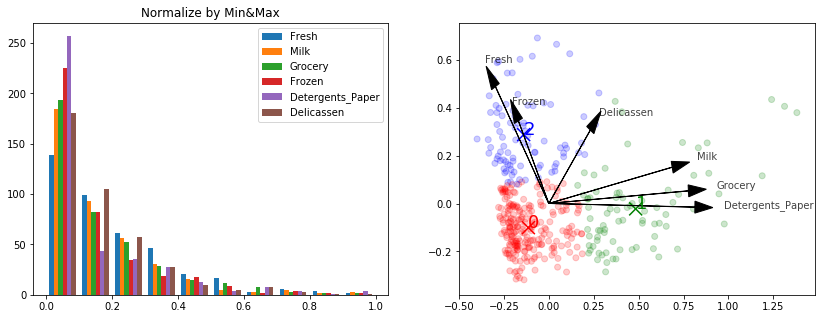

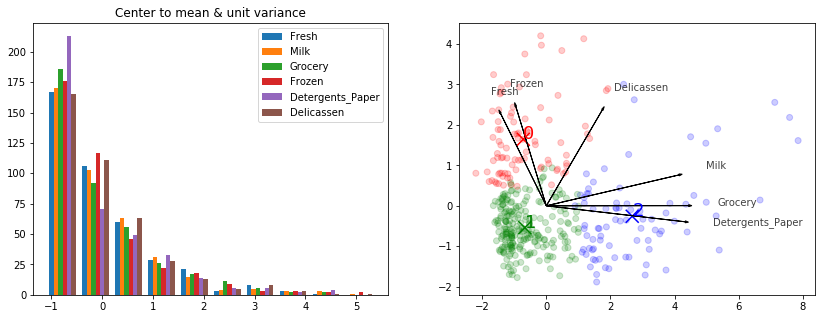

In [12]:
# normalize the features -- compare different normalization method
norms = np.arange(5)
for inorm in norms:
    if inorm == 0:
        Y0 = Y
        Y0 = Y0.as_matrix()
        fttl = 'Not normalized'
    elif inorm == 1:
        Y0 = prep.Normalizer().fit_transform(Y)
        fttl = 'Unit norm'
    elif inorm == 2:
        Y0 = prep.StandardScaler().fit_transform(Y)
        fttl = 'Zero mean & unit variance'
    elif inorm == 3:
        Y0 = prep.MinMaxScaler().fit_transform(Y)
        fttl = 'Normalize by Min&Max'
    elif inorm == 4:
        Y0 = prep.scale(Y)
        fttl = 'Center to mean & unit variance'
#        Y0 = prep.MaxAbsScaler().fit_transform(Y)
#        fttl = 'Normalize by absolute Max'
    plt.figure(inorm, figsize = (14,5))
    plt.subplot(121)
    plt.hist(Y0, label = list(Y.columns.values))
    plt.legend()
    plt.title(fttl)
#    plt.show()
    
    # KMeans clustering on the features
    centroids, labels = doKMeans(Y0, K)
    
    # PCA for visualization
    pca = doPCA(Y0, nD)
    Y2 = pca.transform(Y0)
    centroids2 = pca.transform(centroids)
    
    # visualize
    plt.subplot(122)
    colors = [ clr[labels[i]] for i in range(len(labels)) ]
    # show the samples (clustered)
    plt.scatter(Y2[:,0], Y2[:,1], marker='o', c=colors, alpha = 0.2)
    # show the centroids
    plt.scatter(centroids2[:,0], centroids2[:,1], marker='x', s=169, linewidths=3, c = clr)
    for i in range(K):
        plt.text(centroids2[i,0], centroids2[i,1], str(i), fontsize = 18, color = clr[i])
    # show the features in PC space as vectors
    x = pca.components_[0] * max(Y2[:,0])
    y = pca.components_[1] * max(Y2[:,1])
    Nfeature = Y0.shape[-1]
    for i in range(Nfeature):
        plt.arrow(0, 0, x[i], y[i], color = 'k', head_width = 0.05, head_length = 0.1)
        plt.text(x[i]*1.2, y[i]*1.2, Y.columns.values[i], color = 'k', alpha = 0.75)
    plt.show()